In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
import numpy as np
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import state_fidelity

In [94]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)

In [95]:
def Even(params=[0,0,0,0]):
    qc = QuantumCircuit(qr)
    qc.rz(params[0],0)
    qc.rz(params[1],1)
    qc.rz(params[2],2)
    qc.rz(params[3],3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    return qc

In [96]:
Even().draw()

┌───────┐                  
q3_0: ┤ RZ(0) ├─■──■──■──────────
      ├───────┤ │  │  │          
q3_1: ┤ RZ(0) ├─■──┼──┼──■──■────
      ├───────┤    │  │  │  │    
q3_2: ┤ RZ(0) ├────■──┼──■──┼──■─
      ├───────┤       │     │  │ 
q3_3: ┤ RZ(0) ├───────■─────■──■─
      └───────┘

In [99]:
def Odd(params=[0,0,0,0]):
    qc = QuantumCircuit(qr)
    qc.rx(params[0],0)
    qc.rx(params[1],1)
    qc.rx(params[2],2)
    qc.rx(params[3],3)
    return qc

In [100]:
Odd().draw()

┌───────┐
q3_0: ┤ RX(0) ├
      ├───────┤
q3_1: ┤ RX(0) ├
      ├───────┤
q3_2: ┤ RX(0) ├
      ├───────┤
q3_3: ┤ RX(0) ├
      └───────┘

In [108]:
def LayerBlock(params):
    qc = QuantumCircuit(qr)
    qc.rz(params[0],0)
    qc.rz(params[1],1)
    qc.rz(params[2],2)
    qc.rz(params[3],3)
    qc.cz(0,1)
    qc.cz(0,2)
    qc.cz(0,3)
    qc.cz(1,2)
    qc.cz(1,3)
    qc.cz(2,3)
    qc.barrier()
    qc.rx(params[4],0)
    qc.rx(params[5],1)
    qc.rx(params[6],2)
    qc.rx(params[7],3)
    qc.barrier()
    return qc

In [109]:
LayerBlock(rand_params[0]).draw()

┌─────────────┐                   ░ ┌─────────────┐ ░ 
q3_0: ┤ RZ(-49.343) ├─■──■──■───────────░─┤ RX(-54.226) ├─░─
      ├─────────────┤ │  │  │           ░ ├─────────────┤ ░ 
q3_1: ┤ RZ(-52.075) ├─■──┼──┼──■──■─────░─┤ RX(-52.452) ├─░─
      ├─────────────┤    │  │  │  │     ░ ├─────────────┤ ░ 
q3_2: ┤ RZ(-51.316) ├────■──┼──■──┼──■──░─┤ RX(-51.212) ├─░─
      ├─────────────┤       │     │  │  ░ ├─────────────┤ ░ 
q3_3: ┤ RZ(-49.572) ├───────■─────■──■──░─┤ RX(-52.848) ├─░─
      └─────────────┘                   ░ └─────────────┘ ░

In [110]:
simulator = BasicAer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')

In [164]:
def Task1(L,params):
    qc = QuantumCircuit(qr)
    for i in range(L):
        qc += LayerBlock(params[8*i:8*(i+1)])
    return qc

In [238]:
random_state_vector = random_statevector(dims=(16,))
random_state_vector = np.array(random_state_vector.data)

In [241]:
gradient = np.sign(random_state_vector[0]/np.sqrt(random_state_vector[0].real**2 + random_state_vector[0].imag**2)).real

In [242]:
gradient

-1.0

In [243]:
random_state_vector

array([-0.27835244+0.15413183j,  0.06021219-0.08738925j,
        0.11823987+0.10352895j,  0.00298495-0.12183647j,
        0.3608964 +0.09673775j, -0.2920488 -0.11097094j,
        0.25812755+0.02300338j, -0.0565873 +0.14810863j,
        0.12414525+0.26743644j, -0.37341748+0.08391618j,
       -0.19820897+0.00973066j,  0.34209886+0.20718485j,
        0.14546239+0.17219078j,  0.09690516+0.03401915j,
       -0.06262369-0.12822656j,  0.05328001+0.03354563j])

In [116]:
for i in range(1):
    print('{} {} {} {}'.format(random_state_vector[i],np.sqrt(random_state_vector[i].real**2 + random_state_vector[i].imag**2),value, np.sign(value).real))

(0.019034694554626832-0.0126006187454675j) 0.022827509490887684 [ 0.06482505+0.54591572j  0.32612235-0.47968602j -0.0678882 -0.23940208j
  0.6009269 +0.15988035j -0.14394566-0.07681235j  0.07629198-0.11411392j
 -0.15972828-0.37069633j -0.19637001+0.02645506j -0.56738051-0.1313837j
  0.34665278-0.16821822j -0.00275352+0.12017157j -0.1133614 +0.18892101j
 -0.11802724-0.11882958j -0.15889565+0.07862986j -0.25611327-0.10322641j
  0.06637083-0.18391816j] [ 1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.]


In [117]:
value = state_vector-random_state_vector
cost = cost_fn(loss,4)
sign = np.array(np.sign(value/np.sqrt(value.real**2 + value.imag**2)).real)

In [327]:
sign

array([-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.])

In [121]:
state_vector

array([-0.10877547+0.12213863j,  0.00698882-0.23918845j,
        0.16531468-0.19871644j,  0.52913609+0.11193456j,
       -0.11030042+0.08973611j, -0.02034   -0.06033154j,
       -0.11990209+0.00077454j, -0.16362057-0.05576736j,
       -0.33317537-0.11915925j,  0.29196665-0.11907703j,
        0.14280027+0.00551833j, -0.07360302+0.36270521j,
       -0.16315544-0.18264489j,  0.16356455-0.02783881j,
        0.07055382-0.10422284j,  0.04229536-0.03110628j])

In [122]:
def cost_fn(loss,m):
    return np.sum(loss ** 2) / (2 * m) 

In [123]:
def loss_fn(state_vector,random_state_vector):
    return np.linalg.norm(state_vector - random_state_vector)

In [307]:
n_layers = 2
# x = np.array([1,1,1,1])
initial_rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers*8,))
# rand_params = np.zeros(shape=(n_layers*8,))

nteration : 392
loss : 1.595475782033015
cost : 0.3181928713817326
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 393
loss : 1.5954720493536243
cost : 0.3181913825335817
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 394
loss : 1.5954683452161362
cost : 0.3181899050733395
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 395
loss : 1.5954646696326977
cost : 0.31818843900577165
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 396
loss : 1.5954610226154244
cost : 0.318186984335632
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 397
loss : 1.5954574041763983
cost : 0.3181855410676614
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1

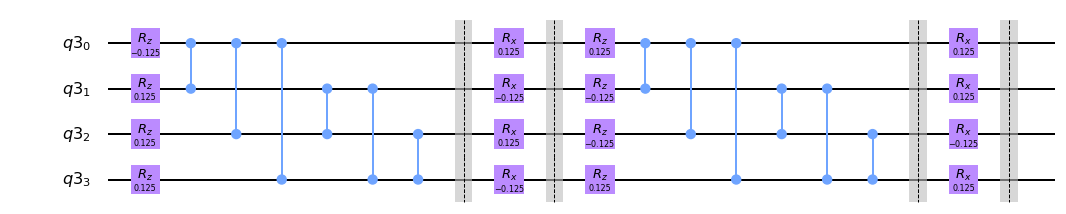

In [347]:
# rand_params = initial_rand_params
rand_params = np.zeros(shape=(n_layers*8,))
numIterations = 500
alpha = 0.001
history = []
for i in range(0,numIterations):
    circ = Task1(n_layers,params=rand_params)
    job = execute(circ, simulator)
    result = job.result()
    state_vector = result.get_statevector(circ)
    # print(state_fidelity(random_state_vector,state_vector))
    loss = loss_fn(state_vector,random_state_vector)
    value = state_vector-random_state_vector
    cost = cost_fn(loss,4)
    gradient = np.array(np.sign(value/np.sqrt(value.real**2 + value.imag**2)).real)
    # gradient = np.sign(loss)
    print('interation : {}'.format(i+1))
    print('loss : {}'.format(loss))
    print('cost : {}'.format(cost))
    print('gradient : {}'.format(gradient))
    print('----------------------------')
    rand_params -= (alpha*gradient)/4
    history.append(cost)
    i = i+1
print(random_state_vector)
print(state_vector)
circ.draw(output='mpl')

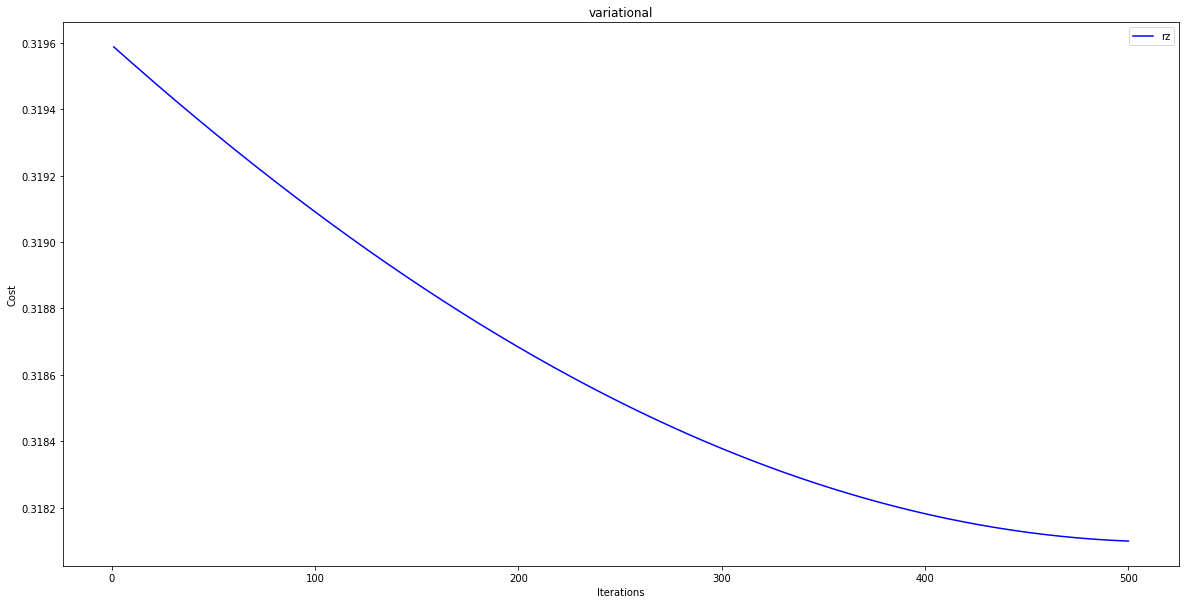

In [348]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history, 'b')
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()


interation : 1
loss : 1.598969945357169
cost : 0.31958811076943855
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 2
loss : 1.5989018970927742
cost : 0.31956090956585903
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 3
loss : 1.5988343879247169
cost : 0.3195339250013255
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 4
loss : 1.5987674207833484
cost : 0.31950715821978004
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 5
loss : 1.5987009985827523
cost : 0.31948061035868613
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.]
----------------------------
interation : 6
loss : 1.5986351242206855
cost : 0.3194542825490108
gradient : [ 1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -

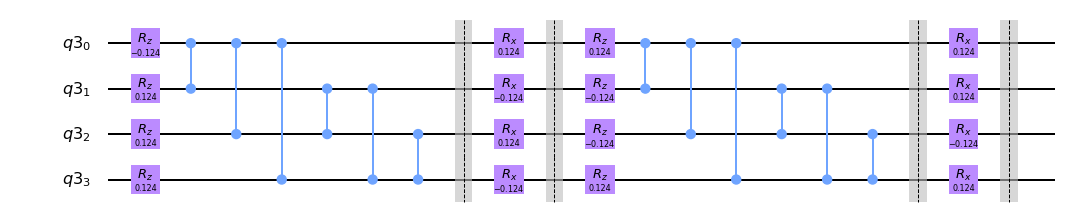

In [344]:
# rand_params = initial_rand_params
rand_params = np.zeros(shape=(n_layers*8,))
numIterations = 100
alpha = 0.005
history = []
for i in range(0,numIterations):
    circ = Task1(n_layers,params=rand_params)
    job = execute(circ, simulator)
    result = job.result()
    state_vector = result.get_statevector(circ)
    # print(state_fidelity(random_state_vector,state_vector))
    loss = loss_fn(state_vector,random_state_vector)
    value = state_vector-random_state_vector
    cost = cost_fn(loss,4)
    gradient = np.array(np.sign(value/np.sqrt(value.real**2 + value.imag**2)).real)
    # gradient = np.sign(loss)
    print('interation : {}'.format(i+1))
    print('loss : {}'.format(loss))
    print('cost : {}'.format(cost))
    print('gradient : {}'.format(gradient))
    print('----------------------------')
    rand_params -= (alpha*gradient)/4
    history.append(cost)
    i = i+1
print(random_state_vector)
print(state_vector)
circ.draw(output='mpl')

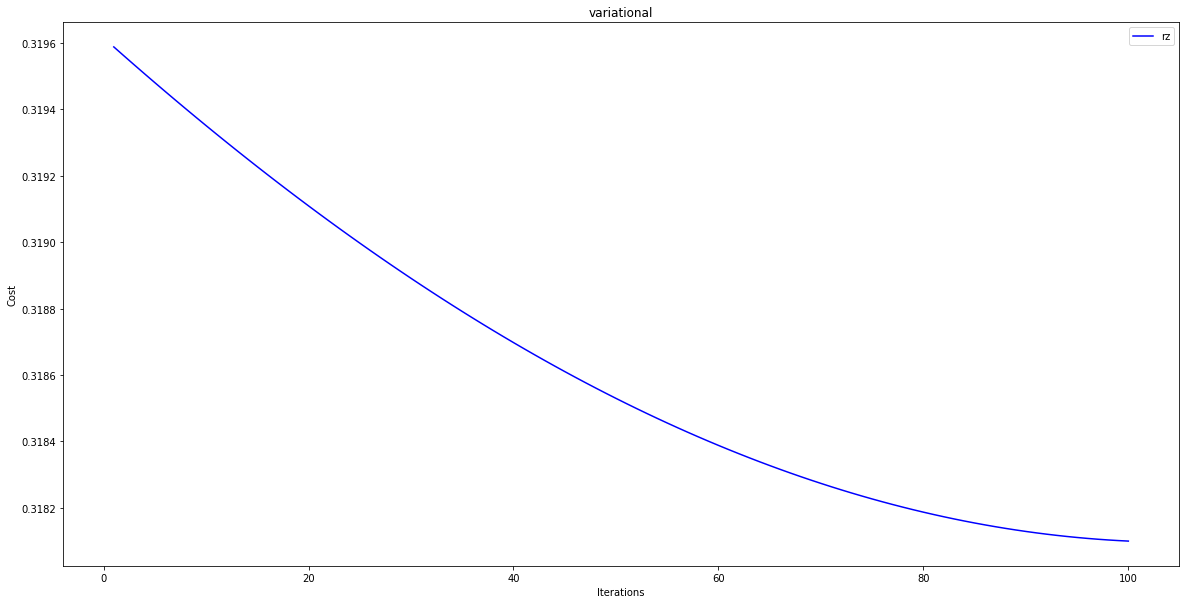

In [345]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history, 'b')
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()


In [346]:
loss = loss_fn(state_vector,random_state_vector)
cost = cost_fn(loss,4)
print('{} {}'.format(loss,cost))

1.5952425179984284 0.3180998364037458


In [355]:
random_state_vector = random_statevector(dims=(16,))
random_state_vector = np.array(random_state_vector.data)

29
cost : 0.19925426029145787
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------------
interation : 93
loss : 1.2623931093425487
cost : 0.1992045453144435
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------------
interation : 94
loss : 1.2622362291881088
cost : 0.199155037284377
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------------
interation : 95
loss : 1.262079988076645
cost : 0.19910573703794301
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------------
interation : 96
loss : 1.2619243888852245
cost : 0.19905664540791843
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------------
interation : 97
loss : 1.2617694344788792
cost : 0.19900776322314384
gradient : [ 1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
----------------------

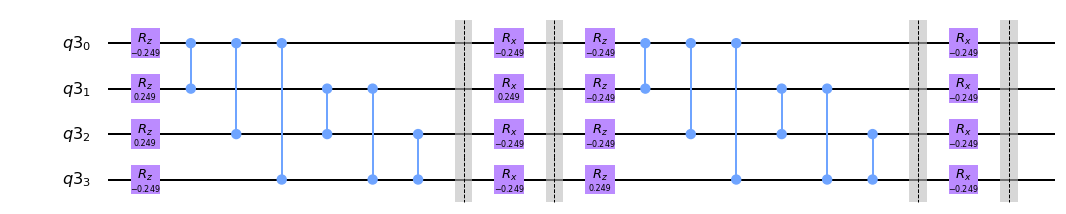

In [360]:
# rand_params = initial_rand_params
rand_params = np.zeros(shape=(n_layers*8,))
numIterations = 200
alpha = 0.005
history = []
for i in range(0,numIterations):
    circ = Task1(n_layers,params=rand_params)
    job = execute(circ, simulator)
    result = job.result()
    state_vector = result.get_statevector(circ)
    # print(state_fidelity(random_state_vector,state_vector))
    loss = loss_fn(state_vector,random_state_vector)
    value = state_vector-random_state_vector
    cost = cost_fn(loss,4)
    gradient = np.array(np.sign(value/np.sqrt(value.real**2 + value.imag**2)).real)
    # gradient = np.sign(loss)
    print('interation : {}'.format(i+1))
    print('loss : {}'.format(loss))
    print('cost : {}'.format(cost))
    print('gradient : {}'.format(gradient))
    print('----------------------------')
    rand_params -= (alpha*gradient)/4
    history.append(cost)
    i = i+1
print(random_state_vector)
print(state_vector)
circ.draw(output='mpl')

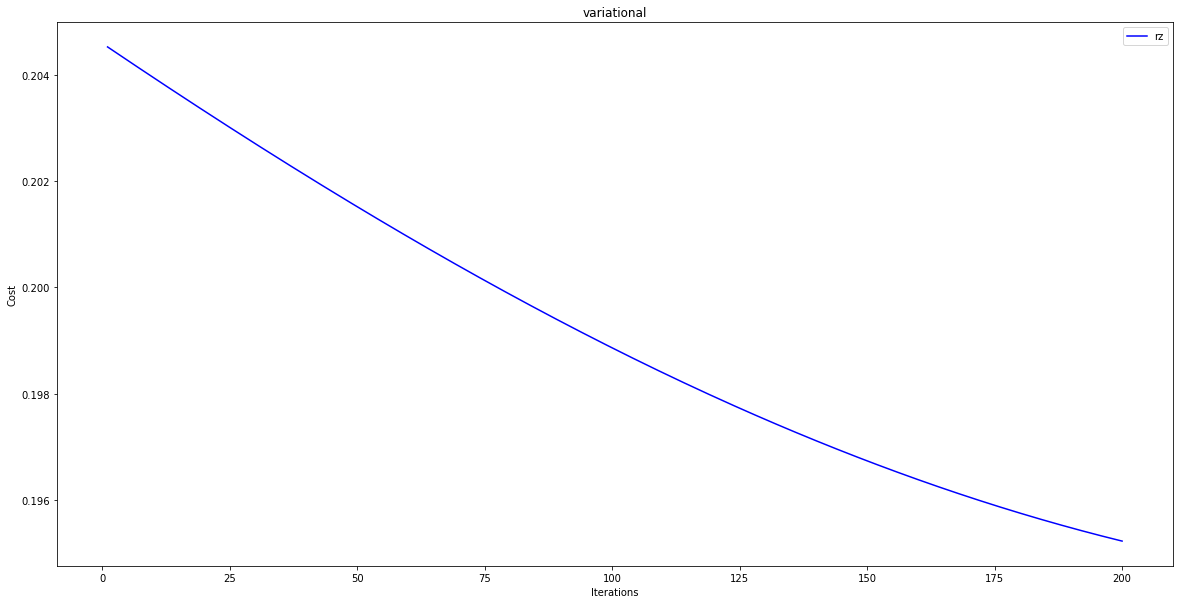

In [361]:
plt.figure(figsize=(20,10))
plt.plot(range(1, len(history) + 1), history, 'b')
plt.legend(['rz'], loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('variational')
plt.show()


In [363]:
a = 5+2j

In [367]:
np.linalg.norm([2,2])

2.8284271247461903

In [391]:
n_layers2 = 3
# x = np.array([1,1,1,1])
initial_rand_params2 = np.random.uniform(high=2 * np.pi, size=(n_layers2*8,))
# rand_params = np.zeros(shape=(n_layers*8,))

In [392]:
initial_rand_params2

array([1.72526611, 5.36729128, 3.2543465 , 0.72545231, 4.70737618,
       1.35579632, 6.12225642, 4.6853445 , 0.47707516, 5.8984912 ,
       4.57078607, 0.31565474, 2.88612715, 6.19051041, 0.37837187,
       3.415895  , 3.56231407, 3.73064381, 2.60375989, 2.47328212,
       5.5191888 , 6.22273123, 3.96650448, 5.16057608])

In [393]:
random_state_vector2 = random_statevector(dims=(16,))
random_state_vector2 = np.array(random_state_vector2.data)

In [394]:
random_state_vector2

array([ 0.10699047-0.13069008j,  0.17047627-0.15122808j,
        0.07285854+0.04392462j,  0.17904048+0.20007261j,
        0.18618999-0.10835129j, -0.4818913 -0.02571437j,
       -0.18296398+0.12162675j, -0.19694463-0.08605861j,
       -0.08088854-0.14695626j,  0.25703061+0.02116851j,
        0.36106002+0.02125144j, -0.06585645+0.2365762j ,
        0.06579135+0.22645554j,  0.06268231-0.23561121j,
        0.05459781+0.15366239j, -0.11163944-0.16305653j])

In [395]:
circ = Task1(3,params=rand_params)
job = execute(circ, simulator)
result = job.result()
state_vector = result.get_statevector(circ)

In [396]:
state_vector.shape

(16,)

In [66]:
class variational:
    def __init__(self,L):
        self.qr = QuantumRegister(4)
        self.L = L
        self.params = np.zeros(shape=(L*8,))
        self.random_state_vector = np.array(random_statevector(dims=(16,)).data)
        self.simulator = Aer.get_backend('statevector_simulator')
        self.backend = Aer.get_backend('qasm_simulator')
        self.history = []
    def Even(self,params=[0,0,0,0]):
        qc = QuantumCircuit(self.qr)
        qc.rz(params[0],0)
        qc.rz(params[1],1)
        qc.rz(params[2],2)
        qc.rz(params[3],3)
        qc.cz(0,1)
        qc.cz(0,2)
        qc.cz(0,3)
        qc.cz(1,2)
        qc.cz(1,3)
        qc.cz(2,3)
        return qc
    def Odd(self,params=[0,0,0,0]):
        qc = QuantumCircuit(self.qr)
        qc.rx(params[0],0)
        qc.rx(params[1],1)
        qc.rx(params[2],2)
        qc.rx(params[3],3)
        return qc
    def LayerBlock(self,params):
        qc = QuantumCircuit(self.qr)
        qc.rz(params[0],0)
        qc.rz(params[1],1)
        qc.rz(params[2],2)
        qc.rz(params[3],3)
        qc.cz(0,1)
        qc.cz(0,2)
        qc.cz(0,3)
        qc.cz(1,2)
        qc.cz(1,3)
        qc.cz(2,3)
        qc.barrier()
        qc.rx(params[4],0)
        qc.rx(params[5],1)
        qc.rx(params[6],2)
        qc.rx(params[7],3)
        qc.barrier()
        return qc
    def Task1(self,params):
        qc = QuantumCircuit(self.qr)
        for i in range(self.L):
            qc += self.LayerBlock(params[8*i:8*(i+1)])
        return qc
    def loss_fn(self,state_vector,random_state_vector):
        return np.linalg.norm(state_vector - random_state_vector)
    def train(self,iteration,show=False,alpha=0.001):
        for i in range(iteration):
            circ = self.Task1(params=self.params)
            job = execute(circ, self.simulator )
            result = job.result()
            state_vector = result.get_statevector(circ)
            # print(state_fidelity(random_state_vector,state_vector))
            loss = self.loss_fn(state_vector,self.random_state_vector)
            value = state_vector-self.random_state_vector
            # cost = cost_fn(loss,4)
            gradient = np.array(np.sign(value/np.sqrt(value.real**2 + value.imag**2)).real)
            gradient = np.sign(loss)
            if show:
                print('interation : {}'.format(i+1))
                print('loss : {}'.format(loss))
                # print('gradient : {}'.format(gradient))
                print('----------------------------')
            self.params -= (alpha*gradient)/4
            self.history.append(loss)
            i = i+1
    def plot(self):
        plt.figure(figsize=(20,10))
        plt.plot(range(1, len(self.history) + 1), self.history, 'b')
        plt.legend(['rz'], loc='upper right')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('variational')
        plt.show()



In [72]:
test = variational(2)

In [76]:
test.train(10)

In [77]:
test.history

[1.5979057428198167,
 1.5978781587019537,
 1.597850542656166,
 1.5978228946988966,
 1.597795214846599,
 1.597767503115736,
 1.5977397595227802,
 1.5977119840842147,
 1.5976841768165315,
 1.5976563377362325,
 1.597628466859829,
 1.5976005642038449,
 1.597572629784811,
 1.5975446636192694,
 1.5975166657237723,
 1.5974886361148826,
 1.597460574809171,
 1.597432481823222,
 1.5974043571736283,
 1.5973762008769923,
 1.5973480129499276,
 1.5973197934090584,
 1.5972915422710185,
 1.5972632595524539,
 1.5972349452700183,
 1.5972065994403781,
 1.5971782220802104,
 1.597149813206201,
 1.5971213728350484,
 1.5970929009834611,
 1.5970643976681576,
 1.597035862905868,
 1.5970072967133333,
 1.5969786991073052,
 1.5969500701045458,
 1.5969214097218287,
 1.5968927179759391,
 1.5968639948836718,
 1.5968352404618344,
 1.5968064547272438,
 1.5967776376967293,
 1.5967487893871308,
 1.5967199098153002,
 1.5966909989981006,
 1.5966620569524053,
 1.5966330836950997,
 1.5966040792430813,
 1.5965750436132582,
 

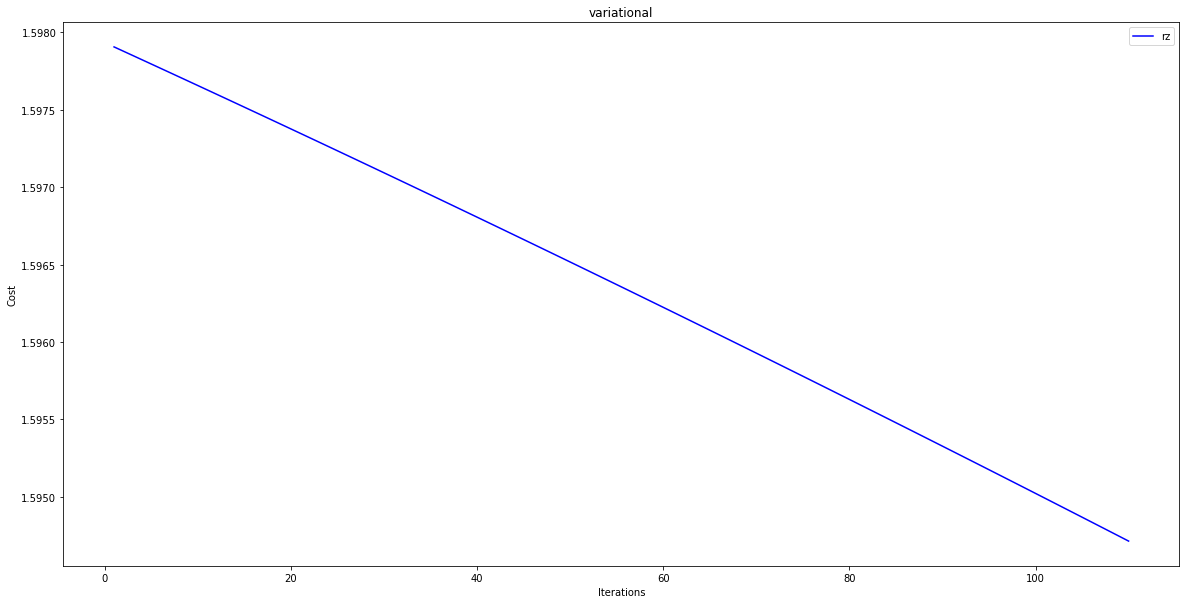

In [78]:
test.plot()

# change rx to ry